In [1]:
from src.utils.dataset import TradingDataset, TradingNormalizer

normalizer = TradingNormalizer(method='z-score', history_len=256)

dataset = TradingDataset(
    data_path='data/',
    mode='validation',
    history_len=256, 
    target_len=32,
    normalizer=normalizer,
)

/Users/honeysuckle/dev/TradingDiffusion/.TradingGDT_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 56463 samples for validation mode


In [40]:
from models.diffusion_model import TradingGDTModel

model = TradingGDTModel.from_pretrained('pretrained-models/TradingGDTTransformer', device='mps')
# model = TradingGDTModel.from_pretrained('pretrained-models/CustomDiffusionModel', device='mps')

Feature extractor успешно загружен
Модель TradingGDTTransformer успешно загружена из pretrained-models/TradingGDTTransformer


History prices shape: torch.Size([1, 256, 5])
Processed prices shape: torch.Size([1, 256, 256])


100%|██████████| 50/50 [00:03<00:00, 15.34it/s]


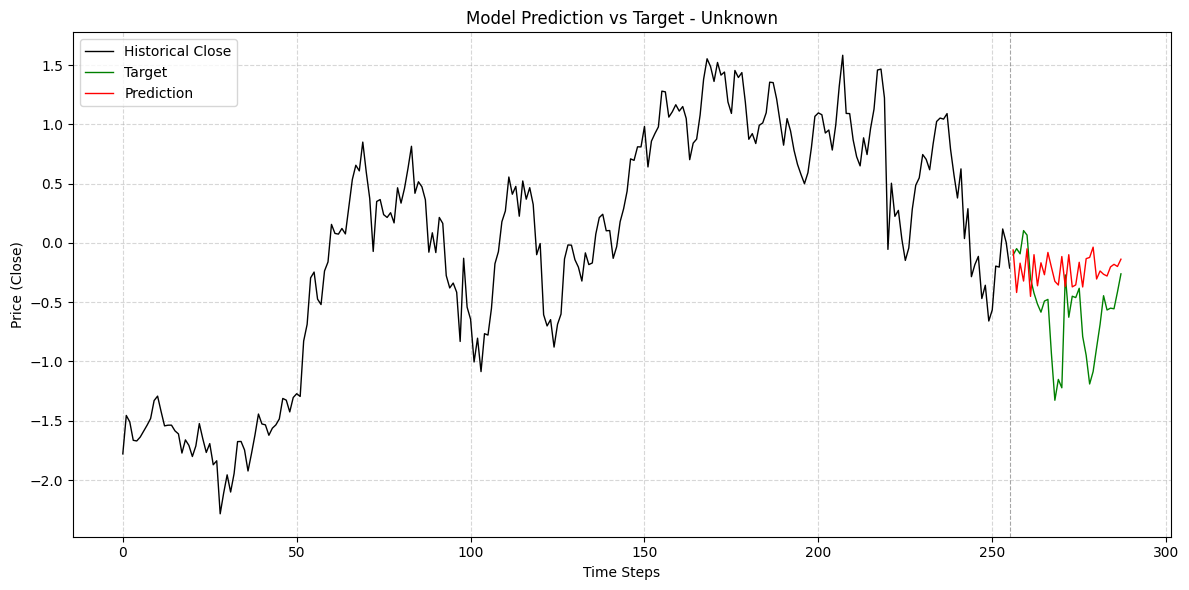

In [46]:
import torch
from src.utils.visualization import plot_model_prediction, plot_model_prediction_denormalized
from pipelines.inference_pipeline import TradingGDTPipeline

pipe = TradingGDTPipeline(device='mps')

idx = torch.randint(0, len(dataset), (1,)).item()
sample = dataset[idx]

predict = pipe(
    model,
    history_prices=sample['history'],
    num_inference_steps=50,
    batch_size=4
)

# plot_model_prediction_denormalized(sample['history'], sample['target'], sample['stats'], predict)
# plot_model_prediction_denormalized(sample['history'], sample['target'], sample['stats'], predict.mean(dim=0, keepdim=True))
plot_model_prediction(sample['history'], sample['target'], predict)